Company A
   year  sales    company
0  2015    100  Company A
1  2016    150  Company A
2  2017    200  Company A
3  2018    250  Company A
4  2019    300  Company A
5  2020    350  Company A
6  2021    400  Company A
7  2022    450  Company A
Company B
    year  sales    company
8   2015    120  Company B
9   2016    180  Company B
10  2017    240  Company B
11  2018    300  Company B
12  2019    360  Company B
13  2020    420  Company B
14  2021    480  Company B
15  2022    540  Company B
Company C
    year  sales    company
16  2015     90  Company C
17  2016    130  Company C
18  2017    170  Company C
19  2018    210  Company C
20  2019    250  Company C
21  2020    290  Company C
22  2021    330  Company C
23  2022    370  Company C


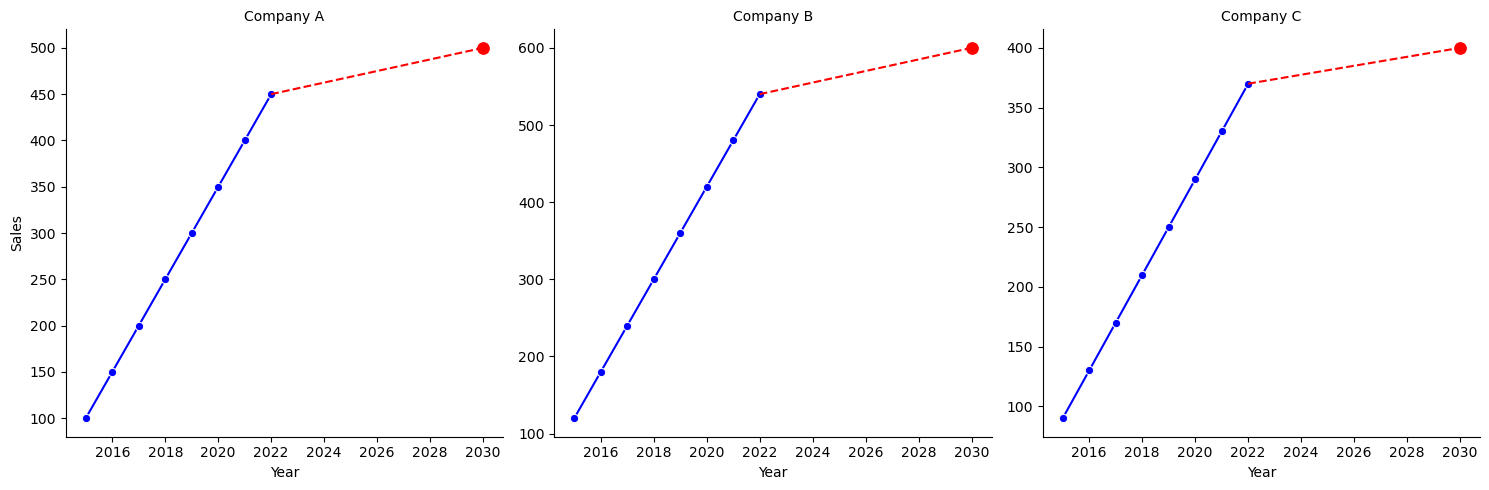

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample dataset
data = {
    'year': list(range(2015, 2023)) * 3 + [2030] * 3,
    'sales': [100, 150, 200, 250, 300, 350, 400, 450] + [120, 180, 240, 300, 360, 420, 480, 540] + [90, 130, 170, 210, 250, 290, 330, 370] + [500, 600, 400],
    'company': ['Company A'] * 8 + ['Company B'] * 8 + ['Company C'] * 8 + ['Company A', 'Company B', 'Company C']
}

df = pd.DataFrame(data)

# Split the data into historical and projected
historical_sales = df[df['year'] < 2030]
projected_sales = df[df['year'] == 2030]

# Initialize a FacetGrid
g = sns.FacetGrid(historical_sales, col='company', height=5, sharey=False)

# Map a line plot onto the grid for historical sales
g.map_dataframe(sns.lineplot, x='year', y='sales', marker='o', linestyle='-', color='blue')

# Function to add dashed lines from last historical point to projected point
def add_dashed_line(data, **kwargs):
    company = data['company'].iloc[0]
    print(company)
    historical = historical_sales[historical_sales['company'] == company]
    print(historical)
    projected = projected_sales[projected_sales['company'] == company]
    plt.plot([historical['year'].iloc[-1], projected['year'].iloc[0]],
             [historical['sales'].iloc[-1], projected['sales'].iloc[0]],
             'r--')

# Add dashed lines connecting the last historical point to the projected point
g.map_dataframe(add_dashed_line, x='year', y='sales')

# Overlay projected sales points with different colors
def add_projected_points(data, **kwargs):
    sns.scatterplot(x='year', y='sales', data=projected_sales[projected_sales['company'] == data['company'].iloc[0]], color='red', s=100)

g.map_dataframe(add_projected_points, x='year', y='sales')

# Customize the plot if necessary (e.g., adding titles, labels)
g.set_axis_labels('Year', 'Sales')
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


In [7]:
plt.plot([historical['year'].iloc[-1], projected['year'].iloc[0]],
             [historical['sales'].iloc[-1], projected['sales'].iloc[0]],
             'r--')

NameError: name 'historical' is not defined